In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [356]:
def data_read(file):
    data = pd.read_table(file, sep=',', index_col=None) 
    data = data.drop(['Qchat-10-Score','Ethnicity', 'Case_No'], axis=1)
    x_data =data.drop(['Class/ASD Traits'],1)
    for y in x_data:
        if x_data[y].dtype == object:
            x_data[y] = x_data[y].astype('category')
            x_data[y] = x_data[y].cat.codes 
            x_data[y] = x_data[y].astype('int64')
    print(x_data.dtypes)
#     data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].astype('category')
#     data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].cat.codes
    return x_data,data

#     bin_data=pd.DataFrame.copy(data)
#     bin_data['Sex']=bin_data['Sex'].apply(lambda x:1 if x=="f" else 0)
#     bin_data['Jaundice']=bin_data['Jaundice'].apply(lambda x:1 if x=="yes" else 0)
#     bin_data['Family_mem_with_ASD']=bin_data['Family_mem_with_ASD'].apply(lambda x:1 if x=="yes" else 0)
# #     converter = lambda x : x*2 if x < 10 else (x*3 if x < 20 else x)
#     bin_data['Who completed the test']=bin_data['Who completed the test'].apply(lambda x:1 if x=="family member" else (0 if x=="Self" else 2))

In [363]:
def box_plots(data,size_of_test):
    x_data = data[0]
    all_data = data[1]
#     print(data['Family_mem_with_ASD']==2)
#     sns.boxplot(x=data['Class/ASD Traits'], y=data['Jaundice'],meanline=True, showmeans=True)
#     plt.show()
    for i in x_data:
        sns.boxplot(x=all_data['Class/ASD Traits'], y=x_data[i],meanline=True, showmeans=True)
        plt.show()
#     sns.boxplot(x=data['Class/ASD Traits'], y=data['Family_mem_with_ASD'],meanline=True, showmeans=True)
#     plt.show()
    
#     for y in bin_data.columns:
#         if bin_data[y].dtype == object:
#             print(bin_data[y])
#     print(bin_data['Sex'].dtype)
#     bin_data['Sex']=bin_data['Sex'].apply(lambda x:1 if x=="f" else 0)
#     sns.boxplot(x=bin_data['Class/ASD Traits'], y=bin_data['Sex'],meanline=True, showmeans=True)
#     plt.show()
#     x = data.drop(['Class/ASD Traits'],1)
#     y = data['Class/ASD Traits']
    
#     X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=size_of_test)
    
#     sns.boxplot(x=Y_train, y=X_train['A1'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A2'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A3'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A4'],meanline=True, showmeans=True)
#     plt.show()
#     sns.boxplot(x=Y_train, y=X_train['A5'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A6'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A7'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A8'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A9'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['A10'],meanline=True, showmeans=True)
#     plt.show()
    
#     sns.boxplot(x=Y_train, y=X_train['Age_Mons'],meanline=True, showmeans=True)
#     plt.show()

In [359]:
def make_plots(data,size_of_test):    
    # - Draw histogram for each column with class/asd to see which columns Influential in class/ASD -
    bin_data=pd.DataFrame.copy(data)
    
    # --------------------- Encode Class/ASD_Traits unique values to 1 or 0 ---------------------
    
    bin_data['Class/ASD Traits']=bin_data['Class/ASD Traits'].apply(lambda x:1 if x=="Yes" else 0)

    for column_name in data.columns:
        if(column_name == 'Class/ASD Traits'):
            continue;
        group_by_modelLine = bin_data[[column_name,'Class/ASD Traits']].groupby(by=[column_name])
        
    # --------------------- get mean to draw histogram ---------------------    
        mean=group_by_modelLine.mean().reset_index()
        mean.columns=[column_name,'positive']
        mean['negative']=mean['positive'].apply(lambda x: 1-x)
        mean=pd.melt(mean, id_vars=column_name, var_name="Pos/Neg", value_name="Class/ASD Traits")
        p=sns.barplot(x=column_name, y='Class/ASD Traits', hue='Pos/Neg', data=mean.reset_index())
        p.legend(loc='best', bbox_to_anchor=(1.28, 1), ncol=1)
        plt.show()

In [360]:
print("reading data")
file = '../dataset/Toddler Autism dataset July 2018.csv'
data = data_read(file)

reading data
A1                        int64
A2                        int64
A3                        int64
A4                        int64
A5                        int64
A6                        int64
A7                        int64
A8                        int64
A9                        int64
A10                       int64
Age_Mons                  int64
Sex                       int64
Jaundice                  int64
Family_mem_with_ASD       int64
Who completed the test    int64
dtype: object


Data visualization.....


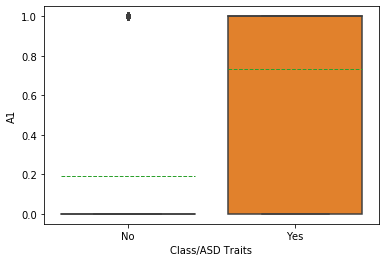

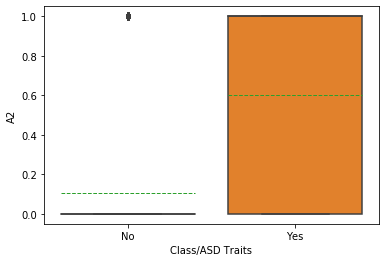

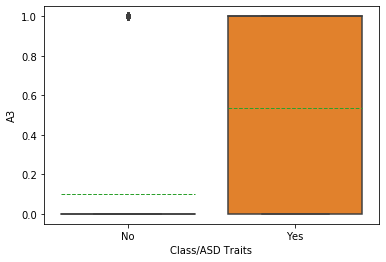

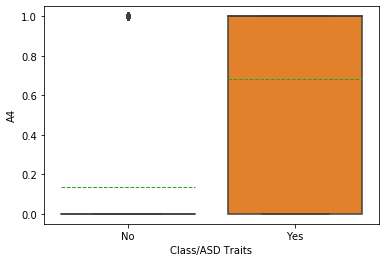

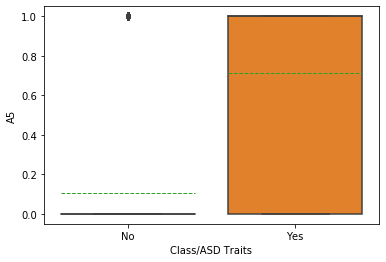

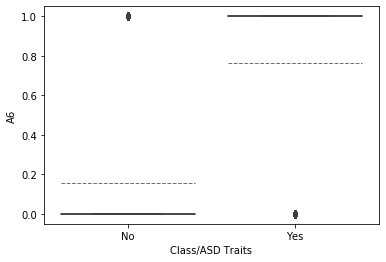

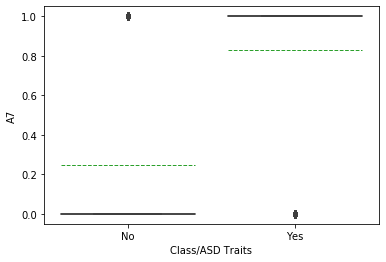

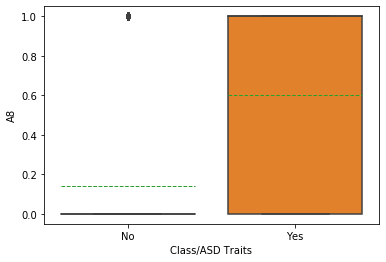

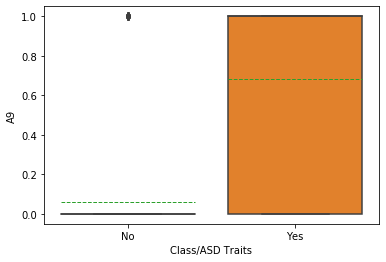

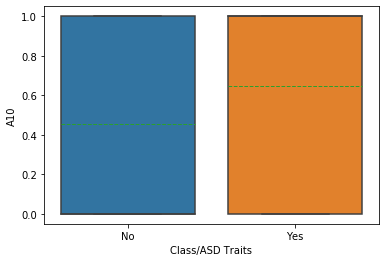

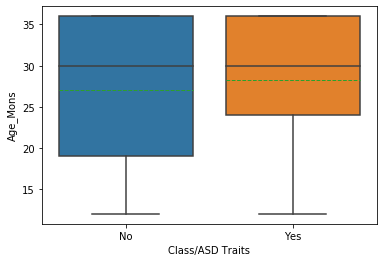

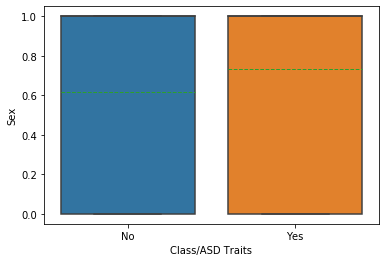

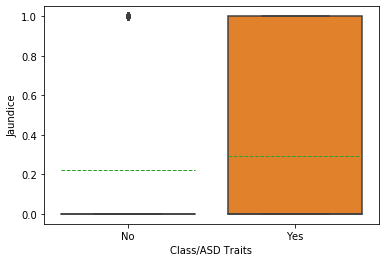

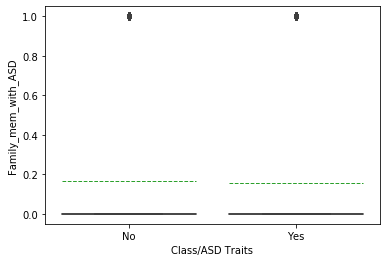

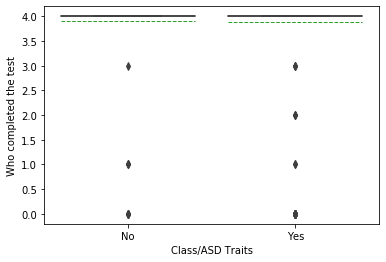

In [364]:
print("Data visualization.....")
box_plots(data,0.2)

In [ ]:
print("make Data visualization.....")
make_plots(data,0.2)